In [ ]:
# Download data if you want to run this code (see HW3 - My Data My Model.md)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# List of locations
location_list = ['Xisanqi', 'Qinghe', 'Xierqi', 'Shangdi']

# Create dictionaries to store data
price_data_dict = {}
rent_data_dict = {}

for location in location_list:
    # Load price data for current location
    price_df = pd.read_csv(f"{location}_Price.csv")
    price_df['price'] = price_df['price'] * 10000    # Unify unit (wan = * 10000)
    price_data_dict[location] = price_df
    
    # Load rent data for current location
    rent_df = pd.read_csv(f"{location}_Rent.csv")
    rent_data_dict[location] = rent_df

# Set style for better visualization
plt.style.use('default')
sns.set_palette("husl")

In [ ]:
# Data Description and Outlier Detection

# Define outlier detection function using IQR method
def detect_outliers_iqr(data, column_name):
    """
    Detect outliers using IQR method
    Returns: outliers dataframe, lower_bound, upper_bound, outlier_count
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
    outlier_count = len(outliers)
    
    return outliers, lower_bound, upper_bound, outlier_count


# Define data description function with outlier detection
def analyze_location_data(location_name, price_df, rent_df):
    """
    Describe data and detect outliers for a single location
    """
    print(f"\n{'='*50}")
    print(f"ANALYZING: {location_name.upper()}")
    print(f"{'='*50}")
    
    # Calculate price per m2 and rent per m2
    price_df['price_per_m2'] = price_df['price'] / price_df['m2']
    rent_df['rent_per_m2'] = rent_df['rent'] / rent_df['m2']
    
    # Data Description
    print(f"\nPRICE DATA DESCRIPTION - {location_name}:")
    print(f"Total records: {len(price_df)}")
    print(price_df[['m2', 'price', 'price_per_m2']].describe())
    
    print(f"\nRENT DATA DESCRIPTION - {location_name}:")
    print(f"Total records: {len(rent_df)}")
    print(rent_df[['m2', 'rent', 'rent_per_m2']].describe())
    
    # Detect outliers
    print(f"\nOUTLIER DETECTION - {location_name}:")
    
    price_outliers_ppm2, price_lower, price_upper, price_outlier_count = detect_outliers_iqr(price_df, 'price_per_m2')
    price_outliers_m2, _, _, price_m2_outliers = detect_outliers_iqr(price_df, 'm2')
    price_outliers_price, _, _, price_price_outliers = detect_outliers_iqr(price_df, 'price')
    
    rent_outliers_rpm2, rent_lower, rent_upper, rent_outlier_count = detect_outliers_iqr(rent_df, 'rent_per_m2')
    rent_outliers_m2, _, _, rent_m2_outliers = detect_outliers_iqr(rent_df, 'm2')
    rent_outliers_rent, _, _, rent_rent_outliers = detect_outliers_iqr(rent_df, 'rent')
    
    print(f"PRICE DATA OUTLIERS:")
    print(f"  price_per_m2: {price_outlier_count} outliers (bounds: [{price_lower:.2f}, {price_upper:.2f}])")
    print(f"  m2: {price_m2_outliers} outliers")
    print(f"  price: {price_price_outliers} outliers")
    
    print(f"RENT DATA OUTLIERS:")
    print(f"  rent_per_m2: {rent_outlier_count} outliers (bounds: [{rent_lower:.2f}, {rent_upper:.2f}])")
    print(f"  m2: {rent_m2_outliers} outliers")
    print(f"  rent: {rent_rent_outliers} outliers")
    
    return price_df, rent_df, price_outlier_count, rent_outlier_count


# Analyze each location
location_analysis_results = {}
for location in location_list:
    price_clean, rent_clean, price_outliers, rent_outliers = analyze_location_data(
        location, price_data_dict[location], rent_data_dict[location]
    )
    location_analysis_results[location] = {
        'price_data': price_clean,
        'rent_data': rent_clean,
        'price_outliers': price_outliers,
        'rent_outliers': rent_outliers
    }


ANALYZING: XISANQI

PRICE DATA DESCRIPTION - Xisanqi:
Total records: 1200
                m2         price   price_per_m2
count  1200.000000  1.200000e+03    1200.000000
mean    111.297658  6.855909e+06   58303.592231
std      55.854613  4.912649e+06   15254.182305
min      37.910000  1.700000e+06   19832.011199
25%      72.300000  3.500000e+06   46348.163377
50%      90.130000  5.250000e+06   58711.697607
75%     134.995000  8.602500e+06   67061.160573
max     333.720000  3.500000e+07  146602.999078

RENT DATA DESCRIPTION - Xisanqi:
Total records: 1102
                m2          rent  rent_per_m2
count  1102.000000   1102.000000  1102.000000
mean     86.127042   7284.755898    90.111859
std      77.478368   8009.130087    30.688343
min       8.000000   1000.000000     1.000000
25%      51.000000   4600.000000    69.662921
50%      76.000000   5700.000000    80.123457
75%      90.000000   6500.000000    98.113208
max    1500.000000  58333.000000   254.545455

OUTLIER DETECTION - Xisa


CALCULATING MEDIAN PRICE TO RENT RATIO FOR EACH LOCATION

Location     Median Price/m2 Median Rent/m2  Price/Rent Ratio
------------------------------------------------------------
Xisanqi      58712           80.12           732.8          
Qinghe       100849          98.77           1021.1         
Xierqi       65493           96.39           679.5          
Shangdi      84650           101.72          832.1          

CREATING FIGURE A: BAR PLOT OF MEDIAN PRICE TO RENT RATIO


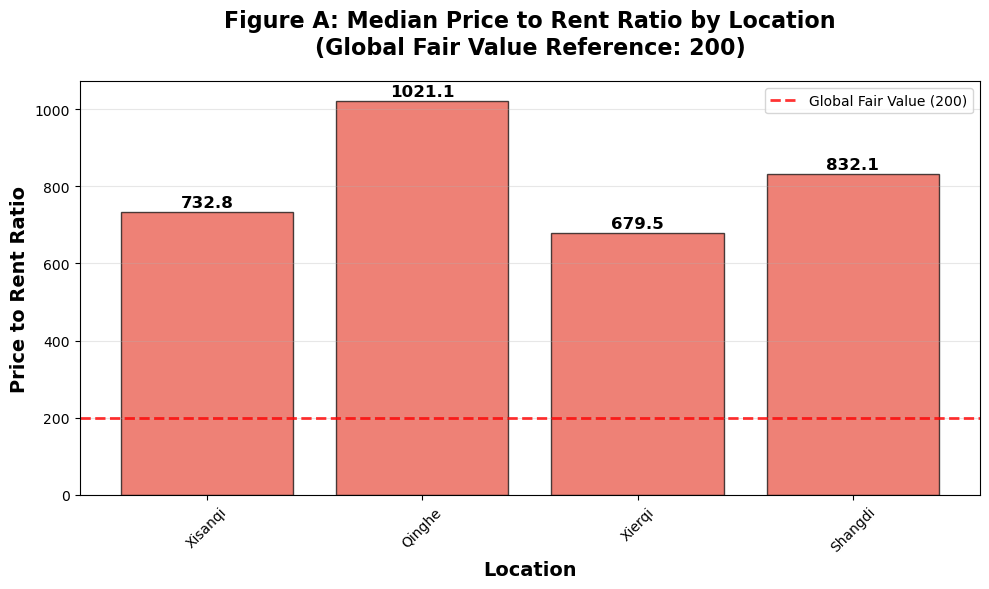


ANALYSIS AND INTERPRETATION

GLOBAL FAIR VALUE COMPARISON:
Global fair value benchmark: 200

Locations ABOVE global fair value (200):
  Xisanqi: 732.8 (+266.4% above fair value)
  Qinghe: 1021.1 (+410.5% above fair value)
  Xierqi: 679.5 (+239.7% above fair value)
  Shangdi: 832.1 (+316.1% above fair value)

Locations BELOW global fair value (200):
  None

KEY INSIGHTS:
• Average price to rent ratio across all locations: 816.4
• Range: 679.5 - 1021.1
• Highest price to rent ratio: Qinghe
• Lowest price to rent ratio: Xierqi


In [ ]:
# Calculate Price to Rent Ratio and Create Bar Plot

# Calculate median price to rent ratio
print("\n" + "="*60)
print("CALCULATING MEDIAN PRICE TO RENT RATIO FOR EACH LOCATION")
print("="*60)

price_to_rent_ratios = {}

print(f"\n{'Location':<12} {'Median Price/m2':<15} {'Median Rent/m2':<15} {'Price/Rent Ratio':<15}")
print("-" * 60)

for location in location_list:
    price_df = price_data_dict[location]
    rent_df = rent_data_dict[location]
    
    # Calculate medians
    median_price_per_m2 = price_df['price_per_m2'].median()
    median_rent_per_m2 = rent_df['rent_per_m2'].median()
    
    # Calculate price to rent ratio (price per m2 / annual rent per m2)
    price_to_rent_ratio = median_price_per_m2 / (median_rent_per_m2)
    price_to_rent_ratios[location] = price_to_rent_ratio
    print(f"{location:<12} {median_price_per_m2:<15.0f} {median_rent_per_m2:<15.2f} {price_to_rent_ratio:<15.1f}")


# Create Figure A: bar plot of median price to rent ratio
print("\n" + "="*60)
print("CREATING FIGURE A: BAR PLOT OF MEDIAN PRICE TO RENT RATIO")
print("="*60)

# Create the plot
plt.figure(figsize=(10, 6))

# Extract data for plotting
locations = list(price_to_rent_ratios.keys())
ratios = list(price_to_rent_ratios.values())

# Create bar plot with different colors based on ratio value
colors = []
for ratio in ratios:
    if ratio <= 200:
        colors.append('#2ecc71')  # Green for at or below fair value
    else:
        colors.append('#e74c3c')  # Red for above fair value

bars = plt.bar(locations, ratios, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on top of bars
for bar, ratio in zip(bars, ratios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add global fair value reference line
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.8, 
            label='Global Fair Value (200)')

# Customize the plot
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Price to Rent Ratio', fontsize=14, fontweight='bold')
plt.title('Figure A: Median Price to Rent Ratio by Location\n(Global Fair Value Reference: 200)', 
          fontsize=16, fontweight='bold', pad=20)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add legend
plt.legend()

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


# Generate analysis and interpretation
print("\n" + "="*60)
print("ANALYSIS AND INTERPRETATION")
print("="*60)

print(f"\nGLOBAL FAIR VALUE COMPARISON:")
print(f"Global fair value benchmark: 200")

# Calculate how each location compares to the global fair value
above_fair_value = []
below_fair_value = []

for location, ratio in price_to_rent_ratios.items():
    if ratio > 200:
        above_fair_value.append(location)
    else:
        below_fair_value.append(location)

print(f"\nLocations ABOVE global fair value (200):")
if above_fair_value:
    for location in above_fair_value:
        ratio = price_to_rent_ratios[location]
        percentage_above = ((ratio - 200) / 200) * 100
        print(f"  {location}: {ratio:.1f} ({percentage_above:+.1f}% above fair value)")
else:
    print("  None")

print(f"\nLocations BELOW global fair value (200):")
if below_fair_value:
    for location in below_fair_value:
        ratio = price_to_rent_ratios[location]
        percentage_below = ((200 - ratio) / 200) * 100
        print(f"  {location}: {ratio:.1f} ({percentage_below:+.1f}% below fair value)")
else:
    print("  None")

# Add key insights
print(f"\nKEY INSIGHTS:")
print(f"• Average price to rent ratio across all locations: {np.mean(ratios):.1f}")
print(f"• Range: {min(ratios):.1f} - {max(ratios):.1f}")
print(f"• Highest price to rent ratio: {max(price_to_rent_ratios, key=price_to_rent_ratios.get)}")
print(f"• Lowest price to rent ratio: {min(price_to_rent_ratios, key=price_to_rent_ratios.get)}")

In [ ]:
# Remove Outliers according to Price to Rent Ratio

# Define outlier removal function
def remove_outliers(df, column_name):
    """Remove outliers using detect_outliers_iqr function"""
    outliers, lower_bound, upper_bound, outlier_count = detect_outliers_iqr(df, column_name)
    cleaned_df = df[~df.index.isin(outliers.index)]
    return cleaned_df, outlier_count


# Remove outliers
price_data_clean_dict = {}
rent_data_clean_dict = {}

for location in location_list:
    # Process price data
    price_df = price_data_dict[location].copy()
    price_clean, price_outliers = remove_outliers(price_df, 'price_per_m2')
    price_data_clean_dict[location] = price_clean
    
    # Process rent data
    rent_df = rent_data_dict[location].copy()
    rent_clean, rent_outliers = remove_outliers(rent_df, 'rent_per_m2')
    rent_data_clean_dict[location] = rent_clean
    
    print(f"{location}: Removed {price_outliers} price_per_m2 outliers, {rent_outliers} rent_per_m2 outliers")

Xisanqi: Removed 19 price_per_m2 outliers, 83 rent_per_m2 outliers
Qinghe: Removed 12 price_per_m2 outliers, 111 rent_per_m2 outliers
Xierqi: Removed 2 price_per_m2 outliers, 28 rent_per_m2 outliers
Shangdi: Removed 21 price_per_m2 outliers, 36 rent_per_m2 outliers



MODEL 1: PRICE PER M2 REGRESSION (NO INTERCEPT)
Model 1 Coefficients:
  m2: 76.74
  loc_Qinghe: 88727.91
  loc_Shangdi: 81065.70
  loc_Xierqi: 57675.04
  loc_Xisanqi: 49050.83
R²: 0.4175

MODEL 2: RENT PER M2 REGRESSION (NO INTERCEPT)
Model 2 Coefficients:
  m2: -0.14
  loc_Qinghe: 111.28
  loc_Shangdi: 116.86
  loc_Xierqi: 114.31
  loc_Xisanqi: 95.60
R²: 0.2136

PREDICTING WITH MODEL 1+ AND MODEL 2+ FOR ALL OBSERVATIONS
Predictions completed for 4240 individual properties

CALCULATING MEDIAN PRICE TO RENT RATIO BY LOCATION

Location     Median Predicted Ratio Sample Size 
--------------------------------------------------
Xisanqi      659.1                1181        
Qinghe       975.6                1188        
Xierqi       640.8                692         
Shangdi      851.7                1179        

FIGURE B: BAR PLOT OF MEDIAN PREDICTED PRICE TO RENT RATIO


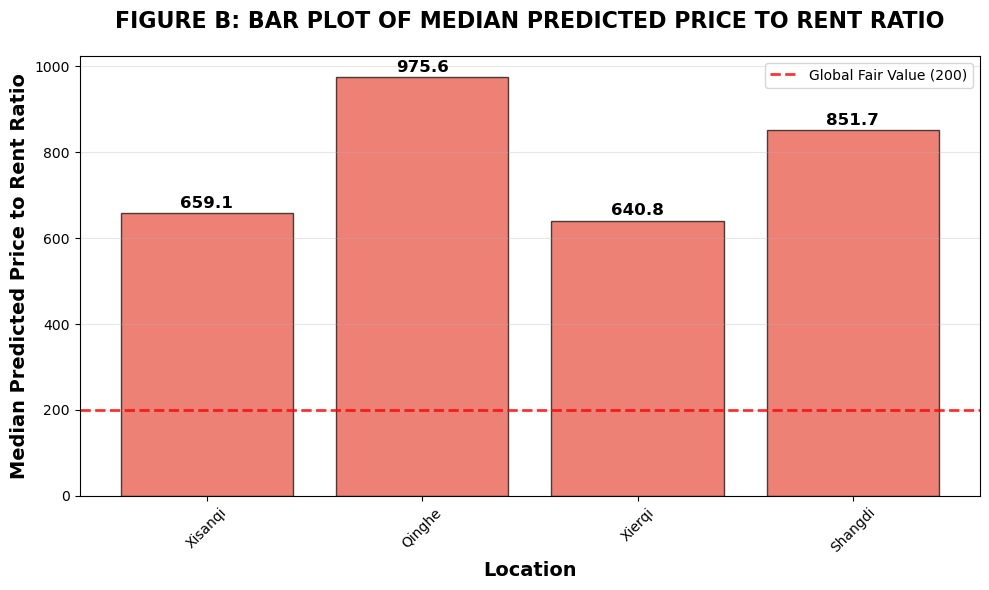


SUMMARY AND INTERPRETATION

Total properties analyzed: 4240

Model Specifications:
Model 1: price_per_m2 = β₁*m2 + β₂*Xisanqi + β₃*Qinghe + β₄*Xierqi + β₅*Shangdi + ε
Model 2: rent_per_m2 = β₁*m2 + β₂*Xisanqi + β₃*Qinghe + β₄*Xierqi + β₅*Shangdi + ε

Investment Recommendations:

Xisanqi: 659.1 - FAVORABLE FOR RENTING
  Predicted ratios above global fair value

Qinghe: 975.6 - FAVORABLE FOR RENTING
  Predicted ratios above global fair value

Xierqi: 640.8 - FAVORABLE FOR RENTING
  Predicted ratios above global fair value

Shangdi: 851.7 - FAVORABLE FOR RENTING
  Predicted ratios above global fair value

Comparison of Actual vs Predicted Median Ratios:
          Actual_Median_Ratio  Predicted_Median_Ratio  Difference
location                                                         
Qinghe                1024.17                  975.57      -48.60
Shangdi                832.06                  851.69       19.62
Xierqi                 645.38                  640.85       -4.53
Xisanqi   

In [13]:
# Build Linear Models to Predict Price and Rent 

# Combine all data for modeling
all_price_data = pd.concat([price_data_clean_dict[loc] for loc in location_list], ignore_index=True)
all_rent_data = pd.concat([rent_data_clean_dict[loc] for loc in location_list], ignore_index=True)

# Prepare features for regression
le = LabelEncoder()
all_price_data['location_encoded'] = le.fit_transform(all_price_data['location'])
all_rent_data['location_encoded'] = le.transform(all_rent_data['location'])

# Create dummy variables for all locations
price_dummies = pd.get_dummies(all_price_data['location'], prefix='loc')
rent_dummies = pd.get_dummies(all_rent_data['location'], prefix='loc')

# Combine with m2 feature and ensure numeric data types
X_price = pd.concat([all_price_data['m2'], price_dummies], axis=1)
X_rent = pd.concat([all_rent_data['m2'], rent_dummies], axis=1)

# Convert price/rent to numeric
X_price = X_price.astype(float)
X_rent = X_rent.astype(float)
y_price = all_price_data['price_per_m2'].astype(float)
y_rent = all_rent_data['rent_per_m2'].astype(float)


# Build Model 1 (model specification see Readme.md)
print("\n" + "="*60)
print("MODEL 1: PRICE PER M2 REGRESSION (NO INTERCEPT)")
print("="*60)

model1 = LinearRegression(fit_intercept=False)
model1.fit(X_price, y_price)

print("Model 1 Coefficients:")
for feature, coef in zip(X_price.columns, model1.coef_):
     print(f"  {feature}: {coef:.2f}")
print(f"R²: {model1.score(X_price, y_price):.4f}")


# Build Model 2 (model specification see Readme.md)
print("\n" + "="*60)
print("MODEL 2: RENT PER M2 REGRESSION (NO INTERCEPT)")
print("="*60)

model2 = LinearRegression(fit_intercept=False)
model2.fit(X_rent, y_rent)
    
print("Model 2 Coefficients:")
for feature, coef in zip(X_rent.columns, model2.coef_):
    print(f"  {feature}: {coef:.2f}")
print(f"R²: {model2.score(X_rent, y_rent):.4f}")


# Predict price_per_m2 and rent_per_m2 for all data
print("\n" + "="*60)
print("PREDICTING WITH MODEL 1+ AND MODEL 2+ FOR ALL OBSERVATIONS")
print("="*60)

all_price_data['predicted_price_per_m2'] = model1.predict(X_price)
all_rent_data['predicted_rent_per_m2'] = model2.predict(X_rent)

# Calculate price to rent ratio for each property
all_price_data['predicted_price_to_rent_ratio'] = (
    all_price_data['predicted_price_per_m2'] / (all_rent_data['predicted_rent_per_m2'])
)

print(f"Predictions completed for {len(all_price_data)} individual properties")

# Calculate median price to rent ratio for each location
print("\n" + "="*60)
print("CALCULATING MEDIAN PRICE TO RENT RATIO BY LOCATION")
print("="*60)

median_ratios = all_price_data.groupby('location')['predicted_price_to_rent_ratio'].median()
median_ratios = median_ratios.reindex(location_list)    # Rearrange by location list

print(f"\n{'Location':<12} {'Median Predicted Ratio':<20} {'Sample Size':<12}")
print("-" * 50)
for location in location_list:
    median_ratio = median_ratios[location]
    sample_size = len(all_price_data[all_price_data['location'] == location])
    print(f"{location:<12} {median_ratio:<20.1f} {sample_size:<12}")


# Create Figure B: Bar Plot of median predicted price to rent ratio
print("\n" + "="*60)
print("FIGURE B: BAR PLOT OF MEDIAN PREDICTED PRICE TO RENT RATIO")
print("="*60)

plt.figure(figsize=(10, 6))

locations = median_ratios.index
ratios = median_ratios.values

# Create bar plot
colors = ['#3498db' if ratio <= 200 else '#e74c3c' for ratio in ratios]
bars = plt.bar(locations, ratios, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, ratio in zip(bars, ratios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add global fair value reference line
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.8, 
            label='Global Fair Value (200)')

# Customize plot
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Median Predicted Price to Rent Ratio', fontsize=14, fontweight='bold')
plt.title('FIGURE B: BAR PLOT OF MEDIAN PREDICTED PRICE TO RENT RATIO', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Generate summary and interpretation
print("\n" + "="*60)
print("SUMMARY AND INTERPRETATION")
print("="*60)

print(f"\nTotal properties analyzed: {len(all_price_data)}")

print(f"\nModel Specifications:")
print("Model 1: price_per_m2 = β₁*m2 + β₂*Xisanqi + β₃*Qinghe + β₄*Xierqi + β₅*Shangdi + ε")
print("Model 2: rent_per_m2 = β₁*m2 + β₂*Xisanqi + β₃*Qinghe + β₄*Xierqi + β₅*Shangdi + ε")

print(f"\nInvestment Recommendations:")
for location in location_list:
    median_ratio = median_ratios_by_location[location]
    if median_ratio <= 200:
        recommendation = "FAVORABLE FOR BUYING"
        reasoning = "Predicted ratios below global fair value"
    else:
        recommendation = "FAVORABLE FOR RENTING"
        reasoning = "Predicted ratios above global fair value"
    
    print(f"\n{location}: {median_ratio:.1f} - {recommendation}")
    print(f"  {reasoning}")

# Compare with actual ratios for validation
all_price_data['actual_price_to_rent_ratio'] = (
    all_price_data['price_per_m2'] / (all_rent_data['rent_per_m2'])
)

actual_median_ratios = all_price_data.groupby('location')['actual_price_to_rent_ratio'].median()

comparison = pd.DataFrame({
    'Actual_Median_Ratio': actual_median_ratios,
    'Predicted_Median_Ratio': median_ratios_by_location,
    'Difference': median_ratios_by_location - actual_median_ratios
})

print("\nComparison of Actual vs Predicted Median Ratios:")
print(comparison.round(2))


R² COMPARISON:
Model 1 (base):     R² = 0.4175
Model 1+ (advanced): R² = 0.4810
Improvement:        +0.0635

Model 2 (base):     R² = 0.2136
Model 2+ (advanced): R² = 0.3738
Improvement:        +0.1603

PREDICTING WITH MODEL 1+ AND MODEL 2+ FOR ALL OBSERVATIONS
Advanced model predictions completed for 4240 individual properties

CALCULATING MEDIAN PRICE TO RENT RATIO BY LOCATION (ADVANCED MODELS)

Location     Median Ratio (Advanced) Sample Size 
--------------------------------------------------
Xisanqi      670.5                1181        
Qinghe       990.7                1188        
Xierqi       660.9                692         
Shangdi      854.9                1179        

FIGURE C: BAR PLOT OF MEDIAN PREDICTED PRICE TO RENT RATIO (ADVANCED MODELS)


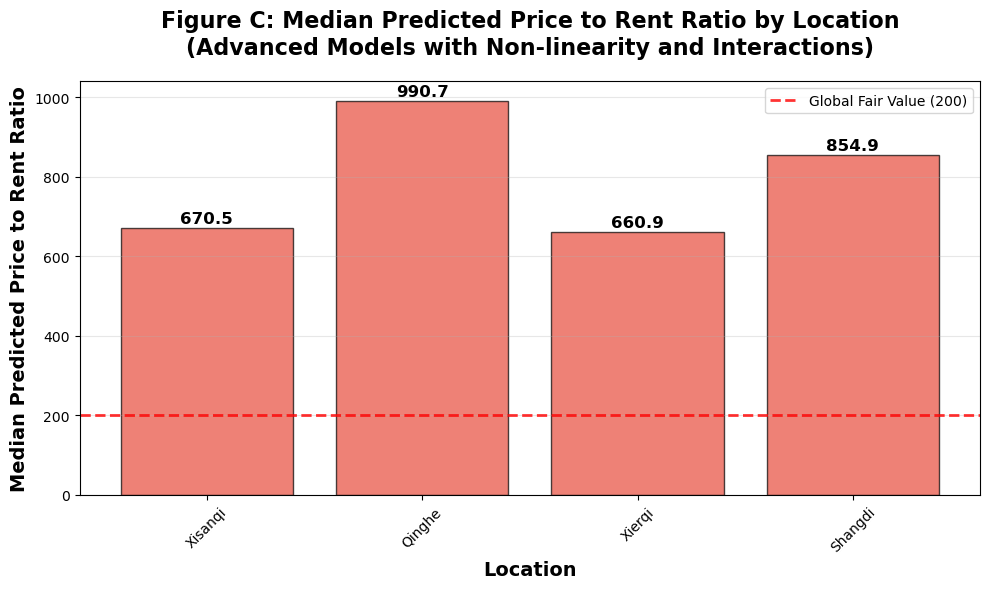


THREE METHODS COMPARISON

Price to Rent Ratio Comparison:
          Method 1 (Actual)  Method 2 (Base Models)  \
location                                              
Qinghe              1043.63                  975.57   
Shangdi              832.57                  851.69   
Xierqi               686.11                  640.85   
Xisanqi              740.20                  659.06   

          Method 3 (Advanced Models)  
location                              
Qinghe                        990.71  
Shangdi                       854.95  
Xierqi                        660.86  
Xisanqi                       670.49  

TRUST RECOMMENDATION BASED ON SAMPLE SIZE

Price to Rent Ratio Comparison with Errors:
          Method 1 (Actual)  Method 2 (Base Models)  \
location                                              
Qinghe              1043.63                  975.57   
Shangdi              832.57                  851.69   
Xierqi               686.11                  640.85   
Xisanqi      

In [18]:
# Build Model 1+: m2_sq + location dummies + m2 × location interactions (NO base m2)
X_price_advanced = X_price.drop('m2', axis=1).copy()  # Remove base m2 to avoid multicollinearity
X_price_advanced['m2_sq'] = X_price['m2'] ** 2  # Non-linearity
# Add interactions: m2 × each location
for col in X_price.columns:
    if col.startswith('loc_'):
        X_price_advanced[f'm2_x_{col}'] = X_price['m2'] * X_price[col]

# Build Model 2+: m2_sq + location dummies + m2 × location interactions (NO base m2)
X_rent_advanced = X_rent.drop('m2', axis=1).copy()  
X_rent_advanced['m2_sq'] = X_rent['m2'] ** 2
for col in X_rent.columns:
    if col.startswith('loc_'):
        X_rent_advanced[f'm2_x_{col}'] = X_rent['m2'] * X_rent[col]

# Build advanced models
model1_plus = LinearRegression(fit_intercept=False).fit(X_price_advanced, y_price)
model2_plus = LinearRegression(fit_intercept=False).fit(X_rent_advanced, y_rent)

# Compare R squared
r2_base_price = model1.score(X_price, y_price)
r2_advanced_price = model1_plus.score(X_price_advanced, y_price)
r2_base_rent = model2.score(X_rent, y_rent)
r2_advanced_rent = model2_plus.score(X_rent_advanced, y_rent)

print(f"\nR² COMPARISON:")
print(f"Model 1 (base):     R² = {r2_base_price:.4f}")
print(f"Model 1+ (advanced): R² = {r2_advanced_price:.4f}")
print(f"Improvement:        +{r2_advanced_price - r2_base_price:.4f}")

print(f"\nModel 2 (base):     R² = {r2_base_rent:.4f}") 
print(f"Model 2+ (advanced): R² = {r2_advanced_rent:.4f}")
print(f"Improvement:        +{r2_advanced_rent - r2_base_rent:.4f}")

# Predict price_per_m2 and rent_per_m2 for all data using advanced models
print("\n" + "="*60)
print("PREDICTING WITH MODEL 1+ AND MODEL 2+ FOR ALL OBSERVATIONS")
print("="*60)

all_price_data['predicted_price_per_m2_advanced'] = model1_plus.predict(X_price_advanced)
all_rent_data['predicted_rent_per_m2_advanced'] = model2_plus.predict(X_rent_advanced)

# Calculate price to rent ratio using advanced model predictions
all_price_data['predicted_price_to_rent_ratio_advanced'] = (
    all_price_data['predicted_price_per_m2_advanced'] / 
    (all_rent_data['predicted_rent_per_m2_advanced'])
)

print(f"Advanced model predictions completed for {len(all_price_data)} individual properties")

# Calculate median price to rent ratio for each location using advanced models
print("\n" + "="*60)
print("CALCULATING MEDIAN PRICE TO RENT RATIO BY LOCATION (ADVANCED MODELS)")
print("="*60)

median_ratios_advanced = all_price_data.groupby('location')['predicted_price_to_rent_ratio_advanced'].median()
median_ratios_advanced = median_ratios_advanced.reindex(location_list)    # Rearrange by location list

print(f"\n{'Location':<12} {'Median Ratio (Advanced)':<20} {'Sample Size':<12}")
print("-" * 50)
for location in location_list:
    median_ratio = median_ratios_advanced[location]
    sample_size = len(all_price_data[all_price_data['location'] == location])
    print(f"{location:<12} {median_ratio:<20.1f} {sample_size:<12}")

# Create Figure C: Bar Plot of median predicted price to rent ratio (from advanced models)
print("\n" + "="*60)
print("FIGURE C: BAR PLOT OF MEDIAN PREDICTED PRICE TO RENT RATIO (ADVANCED MODELS)")
print("="*60)

plt.figure(figsize=(10, 6))

locations = median_ratios_advanced.index
ratios = median_ratios_advanced.values

# Create bar plot
colors = ['#3498db' if ratio <= 200 else '#e74c3c' for ratio in ratios]
bars = plt.bar(locations, ratios, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar, ratio in zip(bars, ratios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add global fair value reference line
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, alpha=0.8, 
            label='Global Fair Value (200)')

# Customize plot
plt.xlabel('Location', fontsize=14, fontweight='bold')
plt.ylabel('Median Predicted Price to Rent Ratio', fontsize=14, fontweight='bold')
plt.title('Figure C: Median Predicted Price to Rent Ratio by Location\n(Advanced Models with Non-linearity and Interactions)', 
          fontsize=16, fontweight='bold', pad=20)

plt.grid(axis='y', alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Compare all three methods
print("\n" + "="*60)
print("THREE METHODS COMPARISON")
print("="*60)

# Method 1: Actual ratios from data
actual_ratios = all_price_data.groupby('location')['price_per_m2'].median() / (all_rent_data.groupby('location')['rent_per_m2'].median())

# Method 2: Base model predictions (from previous work)
median_ratios_base = all_price_data.groupby('location')['predicted_price_to_rent_ratio'].median()

# Method 3: Advanced model predictions (just calculated)
median_ratios_advanced = all_price_data.groupby('location')['predicted_price_to_rent_ratio_advanced'].median()

model_comparison = pd.DataFrame({
    'Method 1 (Actual)': actual_ratios,
    'Method 2 (Base Models)': median_ratios_base, 
    'Method 3 (Advanced Models)': median_ratios_advanced
})

print("\nPrice to Rent Ratio Comparison:")
print(model_comparison.round(2))


# Make trust recommendation based on sample size
print("\n" + "="*60)
print("TRUST RECOMMENDATION BASED ON SAMPLE SIZE")
print("="*60)

# Calculate total sample size
total_sample = len(all_price_data)

# Calculate average absolute errors from actual values
model_comparison['Base_Error'] = (model_comparison['Method 2 (Base Models)'] - model_comparison['Method 1 (Actual)']).abs()
model_comparison['Advanced_Error'] = (model_comparison['Method 3 (Advanced Models)'] - model_comparison['Method 1 (Actual)']).abs()

print("\nPrice to Rent Ratio Comparison with Errors:")
print(model_comparison.round(2))

print(f"\nTotal sample size: {total_sample} properties")

print(f"\nTRUST RECOMMENDATION:")
if total_sample > 150:
    print("• LARGE sample size (>150) - Trust Advanced Models (Method 3)")
    print("• Reason: Enough data to support complex relationships without overfitting")
    print("• Advanced models capture real non-linear and interaction effects")
    trusted_method = "Method 3 (Advanced Models)"
else:
    print("• MODERATE/SMALL sample size (≤150) - Trust Base Models (Method 2)") 
    print("• Reason: Risk of overfitting with complex models on limited data")
    print("• Simpler models more reliable with smaller samples")
    trusted_method = "Method 2 (Base Models)"

print(f"\nCONCLUSION: Use {trusted_method}")

# Show investment recommendations based on trusted method
print(f"\nINVESTMENT RECOMMENDATIONS ({trusted_method}):")
for location in model_comparison.index:
    if trusted_method == "Method 3 (Advanced Models)":
        ratio = model_comparison.loc[location, 'Method 3 (Advanced Models)']
    else:
        ratio = model_comparison.loc[location, 'Method 2 (Base Models)']
    
    if ratio <= 200:
        recommendation = "BUY - Favorable price to rent ratio"
    else:
        recommendation = "RENT - Unfavorable price to rent ratio"
    
    print(f"{location}: {ratio:.1f} - {recommendation}")